# **Replicando LeNet e AlexNet no Tensorflow 2.0 usando Keras**

---

Nesta lição, usaremos o **Keras com um backend TensorFlow 2.0** para replicar o **LeNet e o AlexNet** no Keras e treiná-lo para **reconhecer dígitos manuscritos no conjunto de dados MNIST e nas 10 classes de imagens do CIFAR10**
1. Replicar a arquitetura CNN do LeNet (Paper: https://ieeexplore.ieee.org/document/726791)
2. Replicar a arquitetura CNN do AlexNet (Paper: https://papers.nips.cc/paper_files/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html)

## **Vamos construir o LeNet no Keras!**

![](https://www.researchgate.net/profile/Sheraz_Khan8/publication/321586653/figure/fig4/AS:568546847014912@1512563539828/The-LeNet-5-Architecture-a-convolutional-neural-network.png)
## **Arquitetura LeNet**
N.º | Camadas | Forma da saída (altura, largura, canais)
--- | --- | ---
1 | Input Layer | 32 x 32 x 1
2 | Conv2d [6 Filters of size = 5x5, stride = 1, padding = 0 ] | 28 x 28 x 6
3 | Average Pooling [stride = 2, padding = 0] | 14 x 14 x 6
4 | Conv2d [16 Filters of size = 5x5, stride = 1, padding = 0 ] | 10 x 10 x 16
5 | Average Pooling [stride = 2, padding = 0] | 5 x 5 x 16
6 | Conv2d [120 Filters of size = 5x5, stride = 1, padding = 0 ] | 1 x 1 x 120
7 | Linear1 Layer | 120 
8 | Linear2 Layer | 84 
9 | Final Linear Layer | 10

### **Carregando e pré-processando nossos dados**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adadelta

2025-10-08 23:09:55.413566: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-08 23:09:55.960240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759975796.156669     713 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759975796.206166     713 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759975796.624311     713 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [5]:

(x_train, y_train), (x_test, y_test)  = mnist.load_data()


img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Colocando nossos dados no formato correto necessário para o Keras
# Precisamos adicionar uma quarta dimensão à nosso tensor, alterando assim nossa
# imagem original de (60000,28,28) para (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize nossos dados alterando o intervalo de (0 a 255) para (0 a 1)
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

### Criando a arquitetura e suas camadas

In [6]:
#criando o modelo sequencial

model = Sequential()

# Seguindo a arquitetura, temos 3 CRP (Convolução, RELU e Pooling)

model.add(Conv2D(6, (5,5), padding = "same", input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(16, (5,5), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(120, (5,5), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))


#Camada totalmente conectada e linear

model.add(Flatten())
model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

print(model.summary())

/home/gabs/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1759982501.200324     713 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5630 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 7, 7, 120)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 120)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1080)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       129,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,426 (747.76 KB)

 Trainable params: 191,426 (747.76 KB)

 Non-trainable params: 0 (0.00 B)

None


### Treinando a LeNet com o MNIST

In [7]:
batch_size = 128
epochs = 50

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True) #shuffle para embaralhar os batchs

model.save("mnist_LeNet.h5")

#Avaliando a performance

scores = model.evaluate(x_test, y_test, verbose=1)

print("test loss", scores[0])
print("test accuracy", scores[1])

Epoch 1/50


I0000 00:00:1759983741.531171    2991 service.cc:152] XLA service 0x7ec834020420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759983741.531342    2991 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-10-09 01:22:21.626134: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1759983741.909513    2991 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-10-09 01:22:22.853560: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_336', 360 bytes spill stores, 360 bytes spill loads

2025-10-09 01:22:22.969330: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_336'

 43/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0836 - loss: 2.3036

I0000 00:00:1759983748.342417    2991 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0894 - loss: 2.3030

2025-10-09 01:22:31.157599: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_336', 432 bytes spill stores, 432 bytes spill loads

2025-10-09 01:22:31.524408: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_336', 536 bytes spill stores, 536 bytes spill loads

2025-10-09 01:22:31.639788: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_336', 356 bytes spill stores, 356 bytes spill loads

2025-10-09 01:22:32.469755: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_336', 372 bytes spill stores, 372 bytes spill loads

2025-10-09 01:22:32.489299: I extern

469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.0897 - loss: 2.3030 - val_accuracy: 0.1273 - val_loss: 2.2952
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1326 - loss: 2.2927 - val_accuracy: 0.1630 - val_loss: 2.2834
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1685 - loss: 2.2804 - val_accuracy: 0.1969 - val_loss: 2.2706
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2066 - loss: 2.2681 - val_accuracy: 0.2459 - val_loss: 2.2546
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2558 - loss: 2.2518 - val_accuracy: 0.3089 - val_loss: 2.2346
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3221 - loss: 2.2299 - val_accuracy: 0.3692 - val_loss: 2.2083
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3734 - loss: 2.2024 - val_accuracy: 0.4167 - val_loss: 2.1735
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4166 - loss: 2.1676 - val_accuracy: 0.4755 - va

2025-10-09 01:24:16.397673: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_110', 76 bytes spill stores, 76 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9203 - loss: 0.3023
test loss 0.26252105832099915
test accuracy 0.9297000169754028


## Fazendo agora a AlexNet

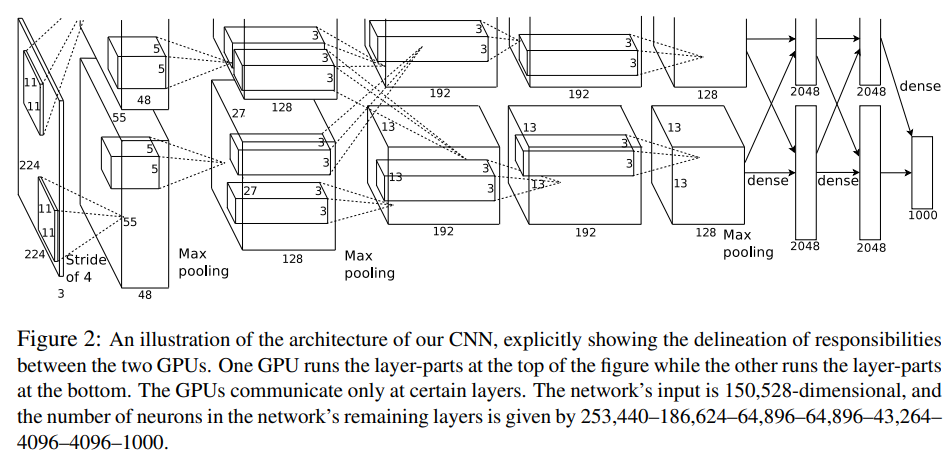

## **Agora vamos replicar o AlexNET e treiná-lo no conjunto de dados CIFAR10**

O AlexNet foi o vencedor do ImageNet 2012, alcançando uma taxa de erro de 15,3% entre os cinco primeiros, mais de 10,8 pontos percentuais abaixo do segundo colocado!

In [10]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = cifar10.load_data()


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [14]:
l2_reg = 0.001

# Initialize model
model = Sequential()

# 1º Conv Layer 
model.add(Conv2D(96, (11, 11), input_shape=x_train.shape[1:],
    padding='same', kernel_regularizer=l2(l2_reg)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2º Conv Layer 
model.add(Conv2D(256, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3º Conv Layer 
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4º Conv Layer 
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 5º Conv Layer 
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 1º FC Layer
model.add(Flatten())
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 2º FC Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 3º FC Layer
model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adadelta(),
              metrics = ['accuracy'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_9                │ (None, 10, 10, 256)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 10, 10, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 10, 10, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 10, 10, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_10               │ (None, 7, 7, 384)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 7, 7, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 7, 7, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_11               │ (None, 9, 9, 384)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 9, 9, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 9, 9, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 9, 9, 256)      │             

 Total params: 37,389,106 (142.63 MB)

 Trainable params: 37,369,950 (142.56 MB)

 Non-trainable params: 19,156 (74.83 KB)

None


In [15]:
# Parametros de treino
batch_size = 64
epochs = 25

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

model.save("CIFAR10_AlexNet_10_Epoch.h5")


scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1617 - loss: 2.4424

2025-10-09 02:27:51.371097: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_267', 8 bytes spill stores, 8 bytes spill loads

2025-10-09 02:27:51.712435: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_267_0', 328 bytes spill stores, 328 bytes spill loads

2025-10-09 02:27:51.788209: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_267', 560 bytes spill stores, 560 bytes spill loads

2025-10-09 02:27:51.894592: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_267', 468 bytes spill stores, 468 bytes spill loads

2025-10-09 02:27:51.939719: I external

782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.1617 - loss: 2.4422 - val_accuracy: 0.3532 - val_loss: 1.8485
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.2838 - loss: 1.9935 - val_accuracy: 0.3992 - val_loss: 1.7445
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.3349 - loss: 1.8684 - val_accuracy: 0.4187 - val_loss: 1.6872
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.3605 - loss: 1.7981 - val_accuracy: 0.4414 - val_loss: 1.6435
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.3878 - loss: 1.7396 - val_accuracy: 0.4543 - val_loss: 1.6100
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.4006 - loss: 1.7035 - val_accuracy: 0.4670 - val_loss: 1.5783
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.4197 - loss: 1.6655 - val_accuracy: 0.4780 - val_loss: 1.5524
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.4339 - loss: 1.6373 - val_accurac

2025-10-09 02:39:28.051743: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_267', 204 bytes spill stores, 204 bytes spill loads

2025-10-09 02:39:28.535732: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_267', 3964 bytes spill stores, 3944 bytes spill loads

2025-10-09 02:39:28.657074: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_267', 992 bytes spill stores, 992 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5736 - loss: 1.3360
Test loss: 1.3386794328689575
Test accuracy: 0.5716000199317932
